In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [11]:
def bounds(RUt, delta):
    T = np.arange(1, RUt.shape[0] + 1)
    dev = np.sqrt(2 * np.log(1 / delta) * T)
    return (RUt.cumsum() + dev) / T

# Usenet1

In [8]:
data = scipy.io.loadmat('usenet1_result.mat')
mistakes_ran = data['mistakes_idx_rnd'].reshape(-1,1)
mistakes_det = data['mistakes_idx_det'].reshape(-1,1)
RUt = data['RUt'].reshape(-1,1)
data_usenet_dwm = scipy.io.loadmat("usenet1_dwm.mat")
mistakes_dwm = data_usenet_dwm['mistakes'].reshape(-1,1)[1:]

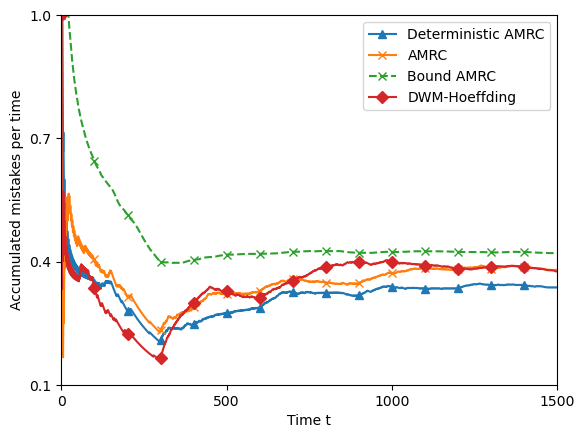

In [12]:
T = np.arange(1, mistakes_det.shape[0]+1)
plt.plot(mistakes_det.cumsum() / T, "-^", label="Deterministic AMRC", markevery=100)
plt.plot(mistakes_ran.cumsum() / T, "-x", label="AMRC", markevery=100)
plt.plot(bounds(RUt, delta=0.05), '--x', label="Bound AMRC", markevery=100)
T = np.arange(1, mistakes_dwm.shape[0]+1)
plt.plot(mistakes_dwm.cumsum() / T, "-D", label="DWM-Hoeffding", markevery=100)
plt.ylim(0.1, 1)
plt.yticks([0.1, 0.4, 0.7, 1])
plt.xlim(0,T[-1])
plt.xticks([0, 500, 1000, 1500])
plt.legend()
plt.ylabel("Accumulated mistakes per time")
plt.xlabel("Time t")
plt.show()

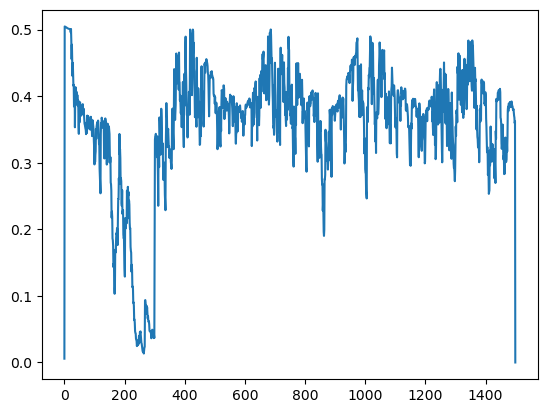

In [10]:
plt.plot(RUt)